In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("./data/categorized_specializations.csv")

In [2]:
df.head()

,userName,major,researchExp,industryExp,toeflScore,program,internExp,greV,greQ,greA,ugCollege,univName,admit,normalized_cgpa,specialization_category,univName_rank,acceptance_rate,univ_state
0,143saf,systems and control,0.0,18.0,112.0,ms,5.0,160.0,167.000000,4.5,dharamsinh desai university,worcester polytechnic institute,1,8.500,robotics engineering,86,58,Massachusetts
1,ab25,mis,0.0,0.0,94.0,ms,0.0,146.0,157.000000,3.0,iet davv,worcester polytechnic institute,1,7.828,mis,86,58,Massachusetts
2,abhijitgang,mis,0.0,0.0,81.0,ms,0.0,130.0,163.829787,2.5,pune university,worcester polytechnic institute,1,5.700,mis,86,58,Massachusetts
3,abhishek001,mis,0.0,0.0,107.0,ms,0.0,130.0,170.000000,6.0,thadomal shahani engineering college,worcester polytechnic institute,1,5.200,information security and management,86,58,Massachusetts
4,agteakash,mis,0.0,0.0,104.0,ms,0.0,150.0,161.000000,4.5,university of mumbai,worcester polytechnic institute,1,6.220,business analytics,86,58,Massachusetts


In [3]:
df.describe

<bound method NDFrame.describe of             userName                          major  researchExp  industryExp  \
0             143saf            systems and control          0.0         18.0   
1               ab25                            mis          0.0          0.0   
2        abhijitgang                            mis          0.0          0.0   
3        abhishek001                            mis          0.0          0.0   
4          agteakash                            mis          0.0          0.0   
...              ...                            ...          ...          ...   
62178      zathurian  electronics and communication          0.0          0.0   
62179      zeal_vyas         electrical engineering          0.0          0.0   
62180      zeal_vyas         electrical engineering          0.0          0.0   
62181  zidanefaraday         electrical engineering          0.0          0.0   
62182       zohaib16         electrical engineering          0.0          0

In [4]:
df.shape

(62183, 18)

In [5]:
print(df.isnull().sum())

userName                   0
major                      0
researchExp                0
industryExp                0
toeflScore                 0
program                    0
internExp                  0
greV                       0
greQ                       0
greA                       0
ugCollege                  0
univName                   0
admit                      0
normalized_cgpa            0
specialization_category    0
univName_rank              0
acceptance_rate            0
univ_state                 0
dtype: int64


In [6]:
df.nunique()

userName                   13804
major                        185
researchExp                   11
industryExp                   41
toeflScore                    59
program                        4
internExp                      6
greV                          57
greQ                          56
greA                          22
ugCollege                   1760
univName                      54
admit                          2
normalized_cgpa             1695
specialization_category     1399
univName_rank                 33
acceptance_rate               43
univ_state                    22
dtype: int64

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11864\115175877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[cat_col], order=df[cat_col].value_counts().index[:top_n], palette="viridis")


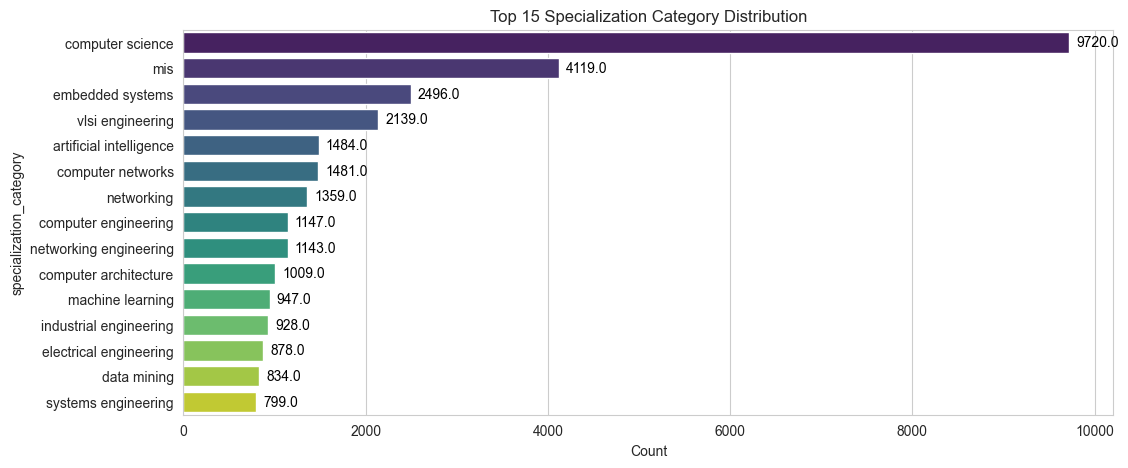

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11864\115175877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[cat_col], order=df[cat_col].value_counts().index[:top_n], palette="viridis")


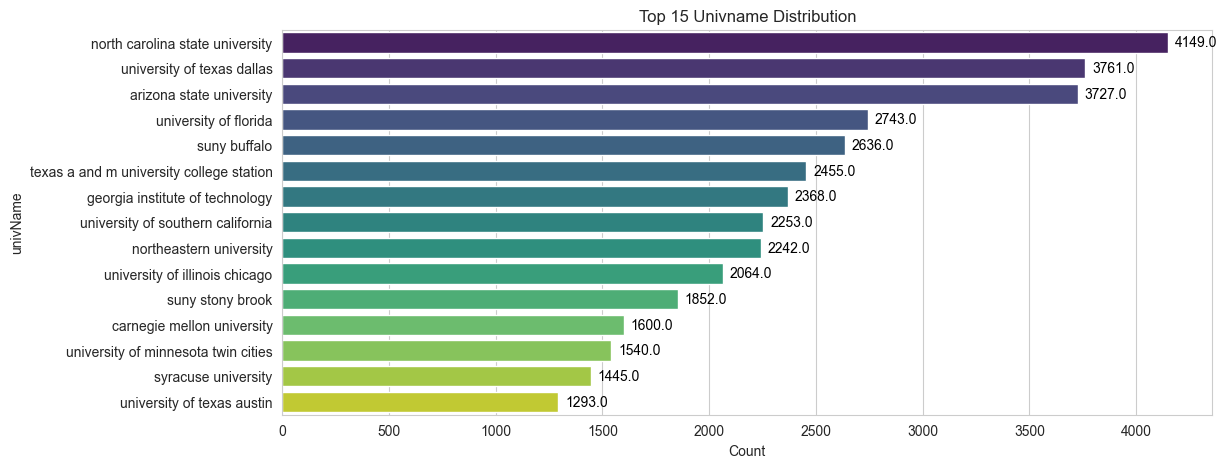

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11864\115175877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[cat_col], order=df[cat_col].value_counts().index[:top_n], palette="viridis")


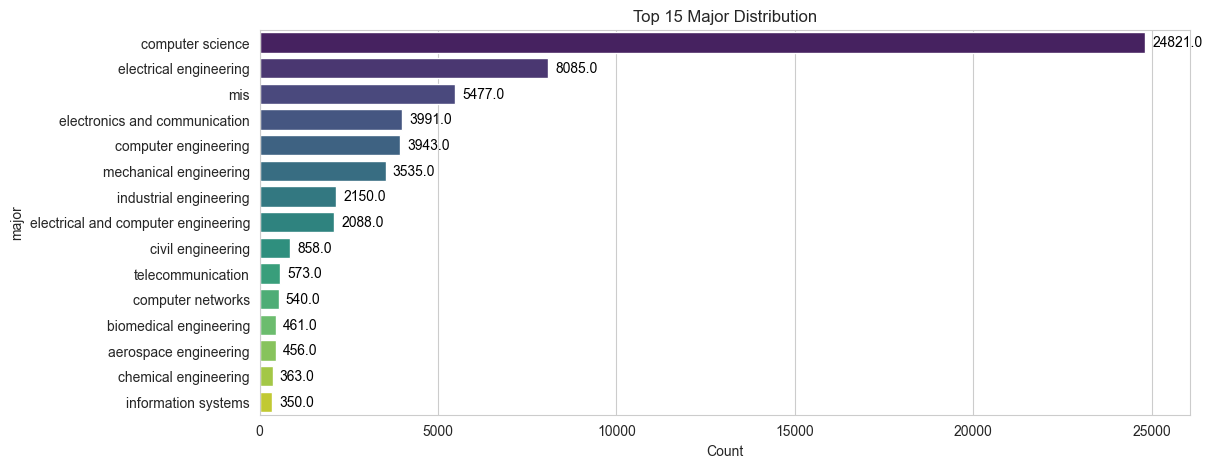

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11864\115175877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[cat_col], order=df[cat_col].value_counts().index[:top_n], palette="viridis")


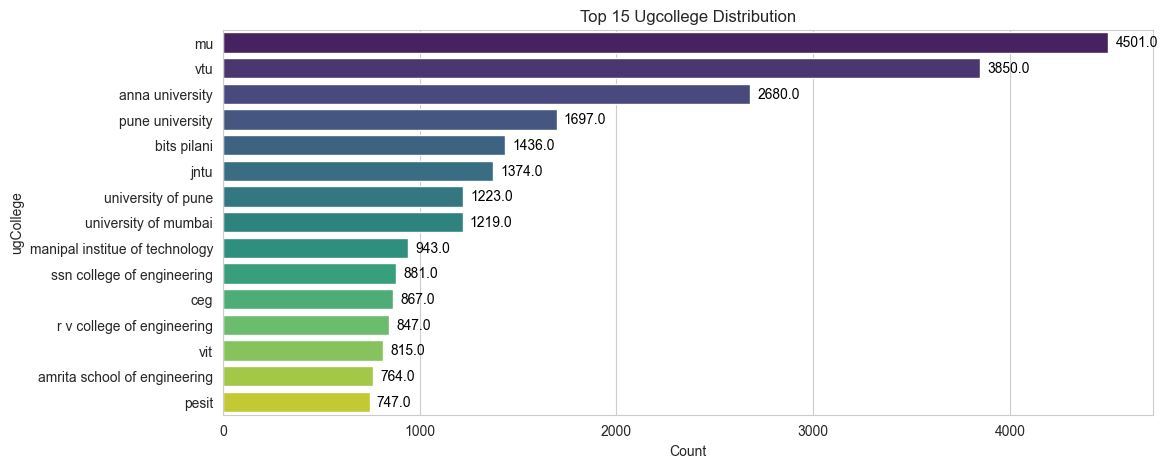

In [7]:
sns.set_style("whitegrid")

categorical_features = ['major', 'ugCollege', 'univ_state', 'specialization_category', 'univName']
numerical_features = ['normalized_cgpa', 'toeflScore', 'greQ', 'greV', 'greA', 'researchExp', 'industryExp', 'internExp']

# Distribution Plots for Categorical Features 
def plot_categorical_distribution(df, cat_col, title, top_n=15):
    plt.figure(figsize=(12, 5))
    ax = sns.countplot(y=df[cat_col], order=df[cat_col].value_counts().index[:top_n], palette="viridis")
    plt.title(f"Top {top_n} {title} Distribution")
    plt.xlabel("Count")
    plt.ylabel(cat_col)
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')
    plt.show()


for col in ['specialization_category', 'univName', 'major', 'ugCollege']:
    plot_categorical_distribution(df, col, col.replace("_", " ").title())


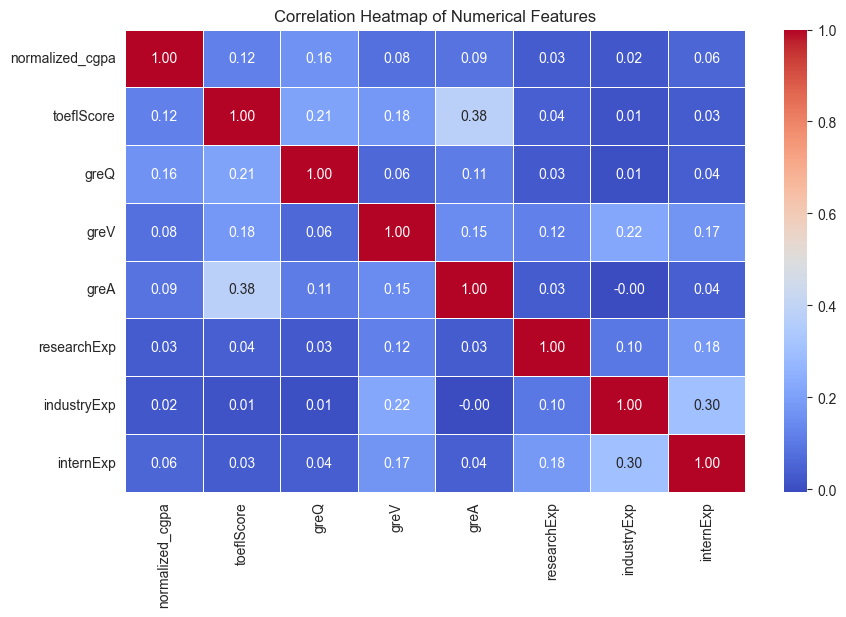

In [8]:
#Correlation Matrix of Numerical Features 
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


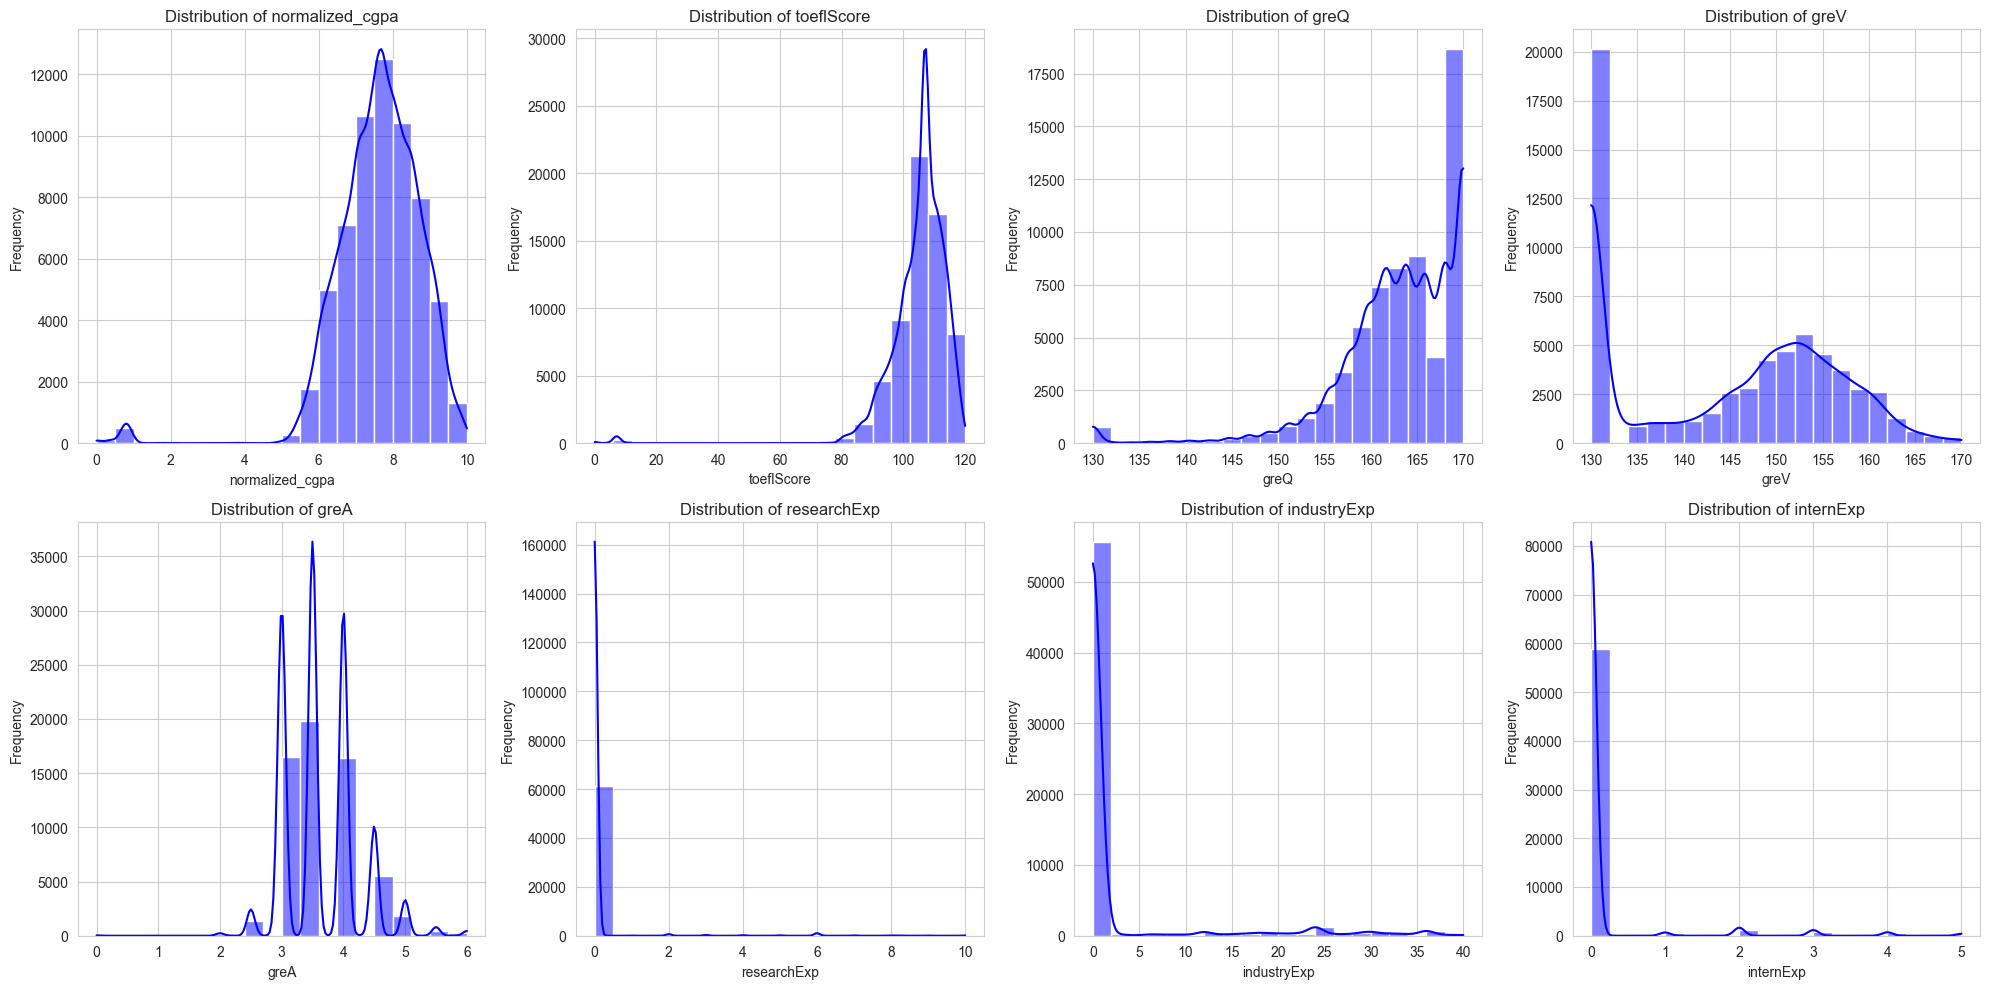

In [9]:
# Histograms for Numerical Features 
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=20, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Missing values in dataset:
 Series([], dtype: int64)


C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11864\3913028597.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(features), x=list(specialization_assoc), palette='viridis')
C:\Users\Keerthana\AppData\Local\Temp\ipykernel_11864\3913028597.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(features), x=list(univ_assoc), palette='viridis')


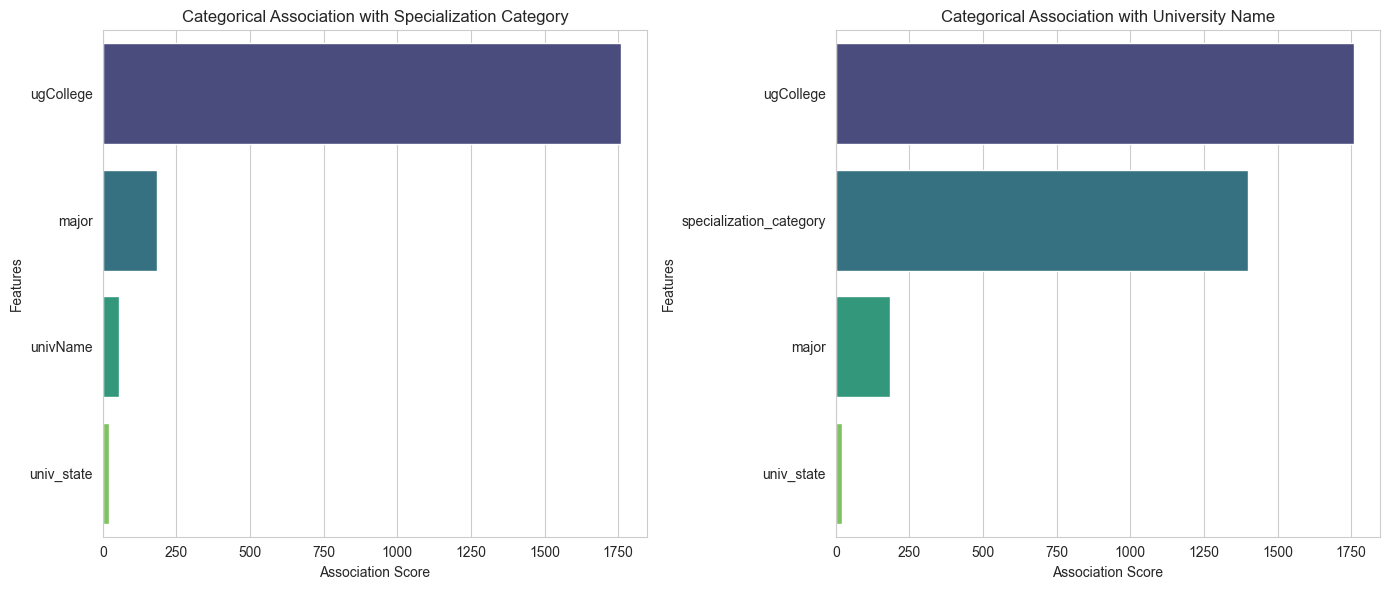

In [10]:
missing_values = df.isnull().sum()
print("Missing values in dataset:\n", missing_values[missing_values > 0])

#Label Encoding for Categorical Correlation
encoded_data = df.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Categorical Associations via Contingency Tables 
categorical_corr_specialization = {}
categorical_corr_univName = {}

for col in categorical_features:
    if col != 'specialization_category':
        contingency_table = pd.crosstab(df[col], df['specialization_category'])
        categorical_corr_specialization[col] = contingency_table.apply(lambda r: r / r.sum(), axis=1).values.sum()

    if col != 'univName':
        contingency_table = pd.crosstab(df[col], df['univName'])
        categorical_corr_univName[col] = contingency_table.apply(lambda r: r / r.sum(), axis=1).values.sum()

# Visualize categorical associations
plt.figure(figsize=(14, 6))

# Specialization category association
specialization_sorted = sorted(categorical_corr_specialization.items(), key=lambda x: x[1], reverse=True)
features, specialization_assoc = zip(*specialization_sorted)

plt.subplot(1, 2, 1)
sns.barplot(y=list(features), x=list(specialization_assoc), palette='viridis')
plt.title('Categorical Association with Specialization Category')
plt.xlabel('Association Score')
plt.ylabel('Features')

# University name association
univ_sorted = sorted(categorical_corr_univName.items(), key=lambda x: x[1], reverse=True)
features, univ_assoc = zip(*univ_sorted)

plt.subplot(1, 2, 2)
sns.barplot(y=list(features), x=list(univ_assoc), palette='viridis')
plt.title('Categorical Association with University Name')
plt.xlabel('Association Score')
plt.ylabel('Features')

plt.tight_layout()
plt.show()
